# Cluster Identification and Local/Neighborhood Structure Preservation 
We need to identify cell type clusters in each dataset and analyze their dynamics across multiple DRs.  
Here, we will use the __entire gene-space__ of each scRNA-seq dataset to determine ground-truth clusters and assign cell type IDs:
* 100 PCs on all genes
* Phenograph clustering using Louvain algorithm
* t-SNE on 100 PCs to visualize ground-truth clusters

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


---
To benchmark dimensionality reduction techniques, we are using two datasets:
* From [__Macosko, *et al* (2015)__](https://www.ncbi.nlm.nih.gov/pubmed/26000488), the mouse retina scRNA-seq data generated using DropSeq: [GSM1626793](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1626793)
* From [__Herring, *et al* (2018)__](https://www.ncbi.nlm.nih.gov/pubmed/29153838), the WT mouse colon scRNA-seq data generated using inDrops: [GSM2743164](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2743164)  
  
The first set should be highly __discrete__, containing highly separable cell populations, where the latter should be __continuous__, representing a continuum of branching cell states in the gut epithelium.

In [2]:
import phenograph

In [3]:
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.digital_expression_filtered_CH.tsv.gz')
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq_filtered_CH.tsv.gz')

In [4]:
retina.data.shape

(1326, 20478)

In [5]:
colon.data.shape

(1117, 25505)

In [6]:
# perform 100-component PCA on both datasets to prime tSNE and clustering
retina_PCA100 = fcc_PCA(retina.arcsinh_norm(), n_components=100)
colon_PCA100 = fcc_PCA(colon.arcsinh_norm(), n_components=100)

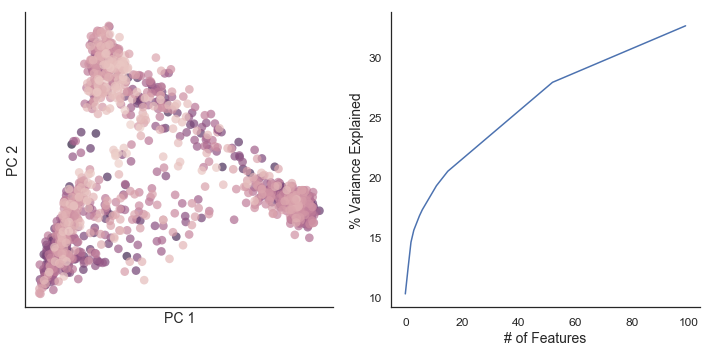

In [7]:
retina_PCA100.plot_PCA()

In [11]:
sum(retina_PCA100.fit.explained_variance_ratio_)

0.3352398301476206

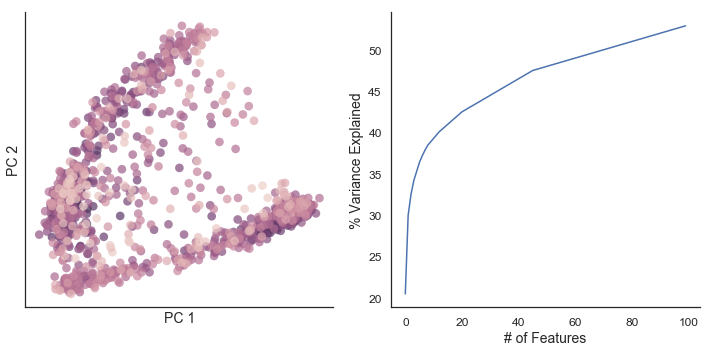

In [8]:
colon_PCA100.plot_PCA()

In [12]:
sum(colon_PCA100.fit.explained_variance_ratio_)

0.5400934279165832

In [15]:
# perform phenograph clustering on 100 PCs of each dataset
retina_clu, retina_graph, retina_Q = phenograph.cluster(retina_PCA100.results, k=50)
colon_clu, colon_graph, colon_Q = phenograph.cluster(colon_PCA100.results, k=100)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.12385988235473633 seconds
Jaccard graph constructed in 0.7197709083557129 seconds
Wrote graph to binary file in 0.26700806617736816 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.769766
Louvain completed 21 runs in 0.5431802272796631 seconds
PhenoGraph complete in 1.685288906097412 seconds
Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11381006240844727 seconds
Jaccard graph constructed in 2.134120225906372 seconds
Wrote graph to binary file in 0.35276126861572266 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.691015
Louvain completed 21 runs in 0.5782902240753174 seconds
PhenoGraph complete in 3.1971840858459473 seconds


---
Visualize clusters and plot gene expression to identify them

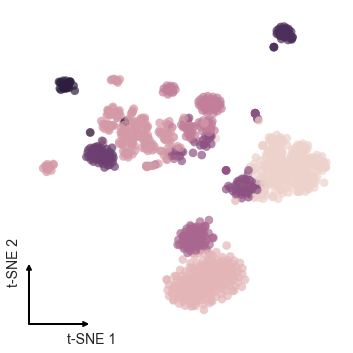

CPU times: user 15.9 s, sys: 103 ms, total: 16 s
Wall time: 16 s


In [16]:
%%time
retina_tSNE = fcc_tSNE(matrix=retina_PCA100.results, perplexity=30, seed=18)
retina_tSNE.plot(color=retina_clu)

In [21]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Opn1mw$')].flatten(), save_to='../images/retina_clu_Opn1mw.png', figsize=(6,6))

In [22]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Rlbp1$')].flatten(), save_to='../images/retina_clu_Rlbp1.png', figsize=(6,6))

In [23]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Vsx2$')].flatten(), save_to='../images/retina_clu_Vsx2.png', figsize=(6,6))

In [24]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Pax6$')].flatten(), save_to='../images/retina_clu_Pax6.png', figsize=(6,6))

In [25]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Lhx1$')].flatten(), save_to='../images/retina_clu_Lhx1.png', figsize=(6,6))

In [26]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Slc17a6$')].flatten(), save_to='../images/retina_clu_Slc17a6.png', figsize=(6,6))

In [27]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Gad1$')].flatten(), save_to='../images/retina_clu_Gad1.png', figsize=(6,6))

In [28]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Rho$')].flatten(), save_to='../images/retina_clu_Rho.png', figsize=(6,6))

In [29]:
retina_tSNE.plot(color=retina.arcsinh_norm().sum(axis=1), save_to='../images/retina_clu_UMI.png', figsize=(6,6))

---
Same thing for colon dataset now

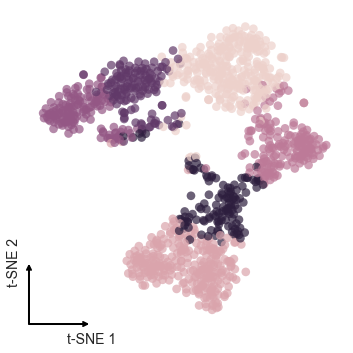

CPU times: user 12.6 s, sys: 145 ms, total: 12.7 s
Wall time: 12.5 s


In [30]:
%%time
colon_tSNE = fcc_tSNE(matrix=colon_PCA100.results, perplexity=30, seed=18)
colon_tSNE.plot(color=colon_clu)

In [16]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Muc2'].flatten(), save_to='../images/colon_clu_Muc2.png', figsize=(6,6))

In [17]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Krt20'].flatten(), save_to='../images/colon_clu_Krt20.png', figsize=(6,6))

In [18]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Reg4'].flatten(), save_to='../images/colon_clu_Reg4.png', figsize=(6,6))

In [19]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Clca1'].flatten(), save_to='../images/colon_clu_Clca1.png', figsize=(6,6))

In [20]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Lrig1'].flatten(), save_to='../images/colon_clu_Lrig1.png', figsize=(6,6))

In [48]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Cd24a'].flatten(), save_to='../images/colon_clu_Cd24a.png', figsize=(6,6))

In [22]:
colon_tSNE.plot(color=colon.arcsinh_norm().sum(axis=1), save_to='../images/colon_clu_UMI.png', figsize=(6,6))

---
### Write results to file

In [31]:
# save tSNE results to file
np.savetxt(X=retina_tSNE.results, fname='pymethods_out/retina_clu_tSNE.csv', delimiter=',')
np.savetxt(X=colon_tSNE.results, fname='pymethods_out/colon_clu_tSNE.csv', delimiter=',')

In [32]:
# save cluster IDs to file
np.savetxt(X=retina_clu, fname='pymethods_out/retina_clu.csv', delimiter=',')
np.savetxt(X=colon_clu, fname='pymethods_out/colon_clu.csv', delimiter=',')

---
### Read in results and plot as barcodes

In [2]:
retina_clu_tSNE = DR.from_file('pymethods_out/retina_clu_tSNE.csv', name='t-SNE', barcodefile='pymethods_out/retina_clu.csv')
colon_clu_tSNE = DR.from_file('pymethods_out/colon_clu_tSNE.csv', name='t-SNE', barcodefile='pymethods_out/colon_clu.csv')

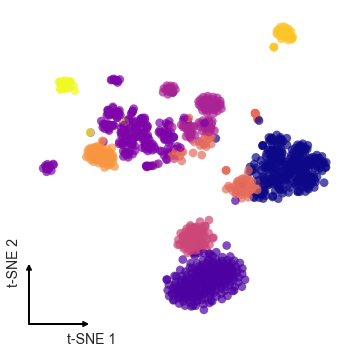

In [3]:
retina_clu_tSNE.plot_barcodes()

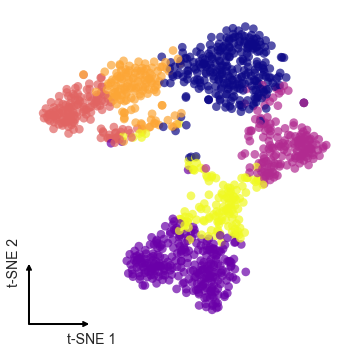

In [4]:
colon_clu_tSNE.plot_barcodes()

In [40]:
colon_clu_tSNE.plot_barcodes(save_to='../images/colon_clu_barcodes.png', figsize=(6,6))

In [41]:
retina_clu_tSNE.plot_barcodes(save_to='../images/retina_clu_barcodes.png', figsize=(6,6))

---

In [11]:
colon_clu_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Muc3'].flatten(), save_to='../images/colon_clu_Muc3.png', figsize=(6,6))

In [13]:
colon_clu_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Ceacam1'].flatten(), save_to='../images/colon_clu_Ceacam1.png', figsize=(6,6))

In [16]:
colon_clu_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Gsdmc4'].flatten(), save_to='../images/colon_clu_Gsdmc4.png', figsize=(6,6))

In [18]:
colon_clu_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Reg3g'].flatten(), save_to='../images/colon_clu_Reg3g.png', figsize=(6,6))

In [31]:
colon_clu_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Hdgf'].flatten(), save_to='../images/colon_clu_Hdgf.png', figsize=(6,6))